## Final Project Submission

Please fill out:
* Student name: AMOS KIPKIRUI
* Student pace: Full time
* Scheduled project review date/time: 12.3.2023


A. Business understanding
 1. Does a studio or production company matters much in terms of Box office and the general revenue of a film?
 2. Every film has a genre. How are different film genres contributing to a box office of a film?
 3. Films differ in terms of quality. Production budget of a film has a direct influence on the quality of the movie. I will be seeking to answer
    the question on whether the production budget affects the box office of a film. 
 4. Does the presence of stars from another field like sports, music or even from the film industry affect the box office of a film?
 5. There are top film producers. Do we have to use them in order to ensure our movies/ films travels up to the international level
    which will in turn increase the box office? Relationship between film producers and the box office of a movie.
 6. Does the rating of a movie affects the box office?
 7. How is the run-time of  film related to gross income of a film/movie?
 8. What are the top 5 movie genres that have high box office?
 9. What are the correlations between the given attributes of the datasets? Of interest is between the other attributes 
     to box office/ revenue generated

### We have to import the following libraries to aid in our code writing and visualizations.

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3 
import matplotlib.pyplot as plt
%matplotlib inline


### We are interested with the top performing films in terms of gross income. We will therefore filter our data to the films generating gross income from above $100,000,000 

In [50]:
bom_df = pd.read_csv('bom.movie_gross.csv.gz') # load the csv file and assign it to a variable called bom_df

bom_df = bom_df[bom_df['domestic_gross'] > 100000000] # filtering the dataset to only the domestic gross above $100000000
bom_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3116,Crazy Rich Asians,WB,174500000.0,64000000,2018
3119,Creed II,MGM,115700000.0,98300000,2018
3121,The Equalizer 2,Sony,102100000.0,88300000,2018
3123,The Mule,WB,103800000.0,68700000,2018


Remove all the characters from our values in the dataset.

In [51]:
bom_df['foreign_gross'].replace('\W', '', regex=True, inplace= True) # foreign_gross had characters in it and so to make it
                                                                     # a float we have to remove them using replace() method.


Foreign gross is an object, we have to change it to a float now that we've removed characters from it.

In [52]:
# .astype() method is used to change a data type to a prefered one. Here we are changing foreign object to float from object
bom_df.foreign_gross = bom_df.foreign_gross.astype(float) 

Checking if there are null values.

In [53]:
bom_df.isna().sum()# isna() is used to check for null values. And sum() sums the null values.

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

From the above analysis, the dataframe has no null values.

In [54]:
bom_df.info() # prints out the information of a dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284 entries, 0 to 3129
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           284 non-null    object 
 1   studio          284 non-null    object 
 2   domestic_gross  284 non-null    float64
 3   foreign_gross   284 non-null    float64
 4   year            284 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 13.3+ KB


We want to know the studios that have been used most in production of films that have both domestic and foreign gross above $ 100,000,000. 
This will help us in identifying the qualities of those studios which makes them favorable for productions.

In [55]:
# count of the studios used in production of films with their gross above $100000000
bom_df.studio.value_counts()

BV         49
Uni.       43
Fox        42
WB         41
Sony       32
Par.       31
WB (NL)    16
P/DW        8
LGF         6
LG/S        5
Wein.       4
Sum.        2
TriS        1
FoxS        1
STX         1
MGM         1
SGem        1
Name: studio, dtype: int64

Histogram showing the frequency of the studios in the movie production

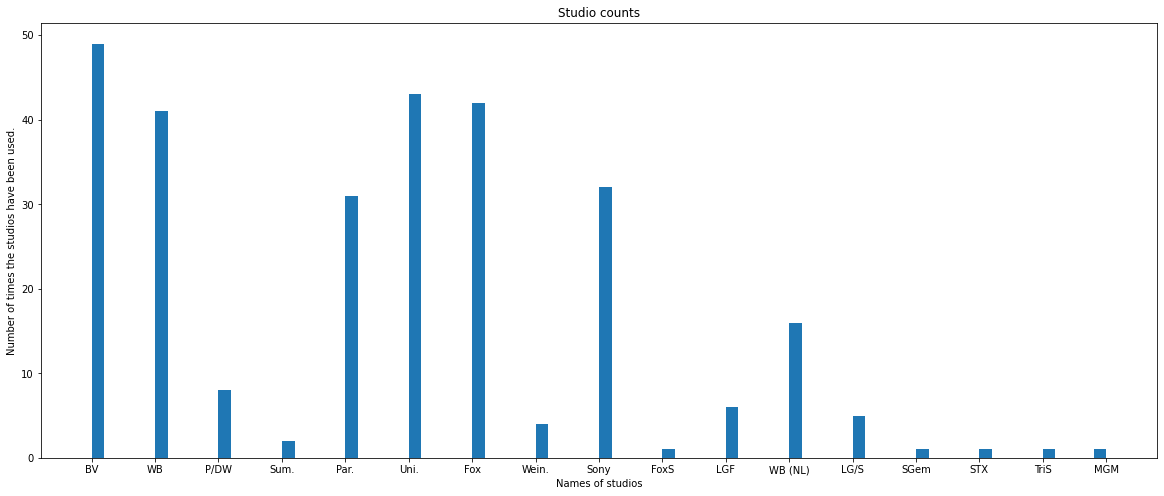

In [56]:
fig, ax = plt.subplots(figsize = (20,8))
ax.hist(bom_df.studio, bins = 80)
ax.set_xlabel('Names of studios')
ax.set_ylabel('Number of times the studios have been used.')
ax.set_title('Studio counts');

From the above analysis; The top movie/film studios are BV.(Buernos Vista), Uni.(Univeral pictures), WB.(Warner Bros), Sony and Par.(Paramount).
I would recommend microsoft to look at what these studios are doing that makes them mostly prefered. Microsoft can perform a benchmark from these studios.

Finding the relationship between studio and the box_office( sum of domestic gross and foreign gross)

In [57]:
# code on creation of a new column called box office which is the sum of domestic gross and foreign gross
bom_df['box_office'] =( bom_df.domestic_gross) + (bom_df.foreign_gross)
bom_df


,title,studio,domestic_gross,foreign_gross,year,box_office
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3116,Crazy Rich Asians,WB,174500000.0,64000000.0,2018,2.385000e+08
3119,Creed II,MGM,115700000.0,98300000.0,2018,2.140000e+08
3121,The Equalizer 2,Sony,102100000.0,88300000.0,2018,1.904000e+08
3123,The Mule,WB,103800000.0,68700000.0,2018,1.725000e+08


Bar graph showing the relationship between studios and box offfice.

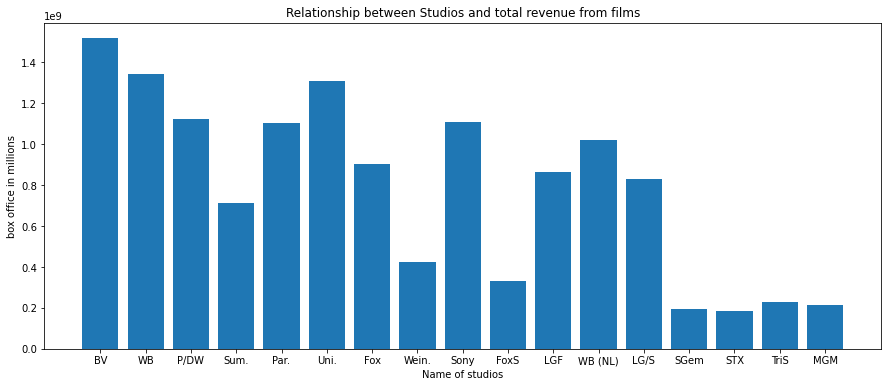

In [58]:
fig, ax = plt.subplots(figsize=(15,6))
plt.bar( x= bom_df.studio, height= bom_df.box_office)
plt.xlabel('Name of studios')
plt.ylabel('box office in millions')
plt.title('Relationship between Studios and total revenue from films')
plt.show()

From the above analysis, We can see that Bv studio has the highest box office, followed by WB. 
BV(Buerno Vista), WB, Uni.(Univeral pictures) are most sorted after and produces films that have among the highest box office. Microsoft studio should match this top studios

### 2. For the below dataset, we are much interested in the top performing films in terms of box office. 
We will use a sample of 20 films in our analysis as this will give us full information on 
the type of films that Microsoft should adopt.

In [59]:
# loading data and assigning it to rottent_df variable. 
rottent_df = pd.read_csv('rotten_tomatoes_top_movies.csv', index_col = 0)
# we extract the columns that are needed for our analysis
rottent_df = rottent_df.loc[:,['title','year','critic_score','type','rating','genre','producer','box_office_(gross_usa)','runtime','crew']].head(20)
# Arrange the rows in a descending order for easy extraction of top performing films.
rottent_df.sort_values(by='box_office_(gross_usa)', ascending= False)

,title,year,critic_score,type,rating,genre,producer,box_office_(gross_usa),runtime,crew
1,Avengers: Endgame,2019,94,Action & Adventure,PG-13 (Sequences of Sci-Fi Violence|Action|Som...,"sci fi, adventure, action, fantasy",Kevin Feige,$858.4M,3h 1m,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ..."
0,Black Panther,2018,96,Action & Adventure,PG-13 (Sequences of Action Violence|A Brief Ru...,"adventure, action, fantasy",Kevin Feige,$700.2M,2h 14m,"Chadwick Boseman, Michael B. Jordan, Lupita Ny..."
10,Star Wars: The Last Jedi,2017,90,Action & Adventure,PG-13 (Violence|Sequences of Sci-Fi Action),"action, sci fi, adventure, fantasy","Kathleen Kennedy, Ram Bergman",$620.2M,2h 32m,"Mark Hamill, Carrie Fisher, Adam Driver, Daisy..."
15,Incredibles 2,2018,93,Action & Adventure,PG (Some Brief Mild Language|Action Sequences),"comedy, animation, action, kids and family, ad...","John Walker, Nicole Paradis Grindle",$608.6M,1h 58m,"Craig T. Nelson, Holly Hunter, Sarah Vowell, H..."
5,Wonder Woman,2017,93,Action & Adventure,PG-13 (Sequences of Violence|Action|Some Sugge...,"adventure, fantasy, action","Charles Roven, Deborah Snyder, Zack Snyder, Ri...",$412.8M,2h 21m,"Gal Gadot, Chris Pine, Connie Nielsen, Robin W..."
14,Spider-Man: Far From Home,2019,90,Action & Adventure,PG-13 (Sci-Fi Action Violence|Brief Suggestive...,"action, comedy, fantasy, adventure","Kevin Feige, Amy Pascal",$390.7M,2h 9m,"Tom Holland, Samuel L. Jackson, Jake Gyllenhaa..."
18,Spider-Man: Homecoming,2017,92,Action & Adventure,PG-13 (Sci-Fi Action Violence|Brief Suggestive...,"adventure, fantasy, action, comedy","Kevin Feige, Amy Pascal",$334.4M,2h 13m,"Tom Holland, Michael Keaton, Robert Downey Jr...."
8,Thor: Ragnarok,2017,93,Action & Adventure,PG-13 (Brief Suggestive Material|Action|Intens...,"comedy, fantasy, sci fi, action, adventure",Kevin Feige,$315.0M,2h 10m,"Chris Hemsworth, Tom Hiddleston, Cate Blanchet..."
9,Logan,2017,93,Action & Adventure,R (Language Throughout|Brief Nudity|Strong Bru...,"adventure, action, fantasy","Hutch Parker, Simon Kinberg, Lauren Shuler Donner",$226.3M,2h 17m,"Hugh Jackman, Patrick Stewart, Dafne Keen, Ric..."
2,Mission: Impossible -- Fallout,2018,97,Action & Adventure,PG-13 (Intense Sequences of Action|Brief Stron...,"action, mystery and thriller, adventure","Tom Cruise, Christopher McQuarrie, Jake Myers,...",$220.1M,2h 27m,"Tom Cruise, Henry Cavill, Ving Rhames, Simon P..."


### Cleaning the dataset

In [60]:
rottent_df.shape

(20, 10)

Check for missing values in the top 20 rows in all the columns.


In [61]:
rottent_df.isna().sum()


title                     0
year                      0
critic_score              0
type                      0
rating                    1
genre                     0
producer                  0
box_office_(gross_usa)    3
runtime                   0
crew                      0
dtype: int64

We will back fill the missing values in box_office_(gross_usa) column.

In [62]:
rottent_df['box_office_(gross_usa)'].fillna(method = 'bfill', inplace= True)
rottent_df

,title,year,critic_score,type,rating,genre,producer,box_office_(gross_usa),runtime,crew
0,Black Panther,2018,96,Action & Adventure,PG-13 (Sequences of Action Violence|A Brief Ru...,"adventure, action, fantasy",Kevin Feige,$700.2M,2h 14m,"Chadwick Boseman, Michael B. Jordan, Lupita Ny..."
1,Avengers: Endgame,2019,94,Action & Adventure,PG-13 (Sequences of Sci-Fi Violence|Action|Som...,"sci fi, adventure, action, fantasy",Kevin Feige,$858.4M,3h 1m,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ..."
2,Mission: Impossible -- Fallout,2018,97,Action & Adventure,PG-13 (Intense Sequences of Action|Brief Stron...,"action, mystery and thriller, adventure","Tom Cruise, Christopher McQuarrie, Jake Myers,...",$220.1M,2h 27m,"Tom Cruise, Henry Cavill, Ving Rhames, Simon P..."
3,Mad Max: Fury Road,2015,97,Action & Adventure,R (Intense Sequences of Violence|Disturbing Im...,"adventure, action","Doug Mitchell, George Miller, P.J. Voeten",$153.6M,2h,"Tom Hardy, Charlize Theron, Nicholas Hoult, Hu..."
4,Spider-Man: Into the Spider-Verse,2018,97,Action & Adventure,PG (Mild Language|Frenetic Action Violence|The...,"action, adventure, fantasy, comedy, kids and f...","Avi Arad, Amy Pascal, Phil Lord, Christopher M...",$190.2M,1h 57m,"Shameik Moore, Hailee Steinfeld, Mahershala Al..."
5,Wonder Woman,2017,93,Action & Adventure,PG-13 (Sequences of Violence|Action|Some Sugge...,"adventure, fantasy, action","Charles Roven, Deborah Snyder, Zack Snyder, Ri...",$412.8M,2h 21m,"Gal Gadot, Chris Pine, Connie Nielsen, Robin W..."
6,Dunkirk,2017,92,Action & Adventure,PG-13 (Some Language|Intense War Experience),"drama, history, war","Emma Thomas, Christopher Nolan",$188.0M,1h 47m,"Fionn Whitehead, Tom Glynn-Carney, Jack Lowden..."
7,Coco,2017,97,Action & Adventure,PG (Thematic Elements),"comedy, music, animation, kids and family, adv...",Darla K. Anderson,$210.5M,1h 49m,"Anthony Gonzalez, Benjamin Bratt, Alanna Ubach..."
8,Thor: Ragnarok,2017,93,Action & Adventure,PG-13 (Brief Suggestive Material|Action|Intens...,"comedy, fantasy, sci fi, action, adventure",Kevin Feige,$315.0M,2h 10m,"Chris Hemsworth, Tom Hiddleston, Cate Blanchet..."
9,Logan,2017,93,Action & Adventure,R (Language Throughout|Brief Nudity|Strong Bru...,"adventure, action, fantasy","Hutch Parker, Simon Kinberg, Lauren Shuler Donner",$226.3M,2h 17m,"Hugh Jackman, Patrick Stewart, Dafne Keen, Ric..."


We have a missing value in rating column. We can drop the row with missing value since it will have a little impact on our dataset.

In [63]:
rottent_df.dropna(axis = 0, inplace=True)

rottent_df.sort_values(by='box_office_(gross_usa)', ascending= False)

,title,year,critic_score,type,rating,genre,producer,box_office_(gross_usa),runtime,crew
1,Avengers: Endgame,2019,94,Action & Adventure,PG-13 (Sequences of Sci-Fi Violence|Action|Som...,"sci fi, adventure, action, fantasy",Kevin Feige,$858.4M,3h 1m,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ..."
0,Black Panther,2018,96,Action & Adventure,PG-13 (Sequences of Action Violence|A Brief Ru...,"adventure, action, fantasy",Kevin Feige,$700.2M,2h 14m,"Chadwick Boseman, Michael B. Jordan, Lupita Ny..."
10,Star Wars: The Last Jedi,2017,90,Action & Adventure,PG-13 (Violence|Sequences of Sci-Fi Action),"action, sci fi, adventure, fantasy","Kathleen Kennedy, Ram Bergman",$620.2M,2h 32m,"Mark Hamill, Carrie Fisher, Adam Driver, Daisy..."
15,Incredibles 2,2018,93,Action & Adventure,PG (Some Brief Mild Language|Action Sequences),"comedy, animation, action, kids and family, ad...","John Walker, Nicole Paradis Grindle",$608.6M,1h 58m,"Craig T. Nelson, Holly Hunter, Sarah Vowell, H..."
5,Wonder Woman,2017,93,Action & Adventure,PG-13 (Sequences of Violence|Action|Some Sugge...,"adventure, fantasy, action","Charles Roven, Deborah Snyder, Zack Snyder, Ri...",$412.8M,2h 21m,"Gal Gadot, Chris Pine, Connie Nielsen, Robin W..."
14,Spider-Man: Far From Home,2019,90,Action & Adventure,PG-13 (Sci-Fi Action Violence|Brief Suggestive...,"action, comedy, fantasy, adventure","Kevin Feige, Amy Pascal",$390.7M,2h 9m,"Tom Holland, Samuel L. Jackson, Jake Gyllenhaa..."
12,The Adventures of Robin Hood,1938,100,Action & Adventure,PG,"action, adventure",Hal B. Wallis,$390.7M,1h 42m,"Errol Flynn, Olivia de Havilland, Basil Rathbo..."
18,Spider-Man: Homecoming,2017,92,Action & Adventure,PG-13 (Sci-Fi Action Violence|Brief Suggestive...,"adventure, fantasy, action, comedy","Kevin Feige, Amy Pascal",$334.4M,2h 13m,"Tom Holland, Michael Keaton, Robert Downey Jr...."
8,Thor: Ragnarok,2017,93,Action & Adventure,PG-13 (Brief Suggestive Material|Action|Intens...,"comedy, fantasy, sci fi, action, adventure",Kevin Feige,$315.0M,2h 10m,"Chris Hemsworth, Tom Hiddleston, Cate Blanchet..."
9,Logan,2017,93,Action & Adventure,R (Language Throughout|Brief Nudity|Strong Bru...,"adventure, action, fantasy","Hutch Parker, Simon Kinberg, Lauren Shuler Donner",$226.3M,2h 17m,"Hugh Jackman, Patrick Stewart, Dafne Keen, Ric..."


Next we check for duplicates. 

In [64]:
rottent_df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
14    False
15    False
16    False
17    False
18    False
19    False
dtype: bool

Well, there are no duplicates. We then look at the data types of each column features.

In [65]:
rottent_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 19
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   title                   19 non-null     object
 1   year                    19 non-null     int64 
 2   critic_score            19 non-null     int64 
 3   type                    19 non-null     object
 4   rating                  19 non-null     object
 5   genre                   19 non-null     object
 6   producer                19 non-null     object
 7   box_office_(gross_usa)  19 non-null     object
 8   runtime                 19 non-null     object
 9   crew                    19 non-null     object
dtypes: int64(2), object(8)
memory usage: 1.6+ KB


box_office_(gross_usa) is of object type instead of float. We then have to change it to float.

In [66]:
rottent_df['box_office_(gross_usa)'] = rottent_df['box_office_(gross_usa)'].replace('\W', '', regex=True) # replace('\w' ..) removes characters and replace them with empty string.
rottent_df['box_office_(gross_usa)'] = rottent_df['box_office_(gross_usa)'].replace('M', '', regex=True)# replace letter M with empty string.

rottent_df['box_office_(gross_usa)'] = rottent_df['box_office_(gross_usa)'].astype(float)# changes the data type to float.


In [67]:
rottent_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 19
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   19 non-null     object 
 1   year                    19 non-null     int64  
 2   critic_score            19 non-null     int64  
 3   type                    19 non-null     object 
 4   rating                  19 non-null     object 
 5   genre                   19 non-null     object 
 6   producer                19 non-null     object 
 7   box_office_(gross_usa)  19 non-null     float64
 8   runtime                 19 non-null     object 
 9   crew                    19 non-null     object 
dtypes: float64(1), int64(2), object(7)
memory usage: 1.6+ KB


Look at the runtime of films top performing films then visualize the data.

In [68]:
rottent_df.runtime

0     2h 14m
1      3h 1m
2     2h 27m
3         2h
4     1h 57m
5     2h 21m
6     1h 47m
7     1h 49m
8     2h 10m
9     2h 17m
10    2h 32m
11    2h 16m
12    1h 42m
14     2h 9m
15    1h 58m
16    1h 48m
17    2h 22m
18    2h 13m
19    1h 53m
Name: runtime, dtype: object

### A bar graph showing the relationship between runtime and box office of a film. Does it affect the selling of the movie?

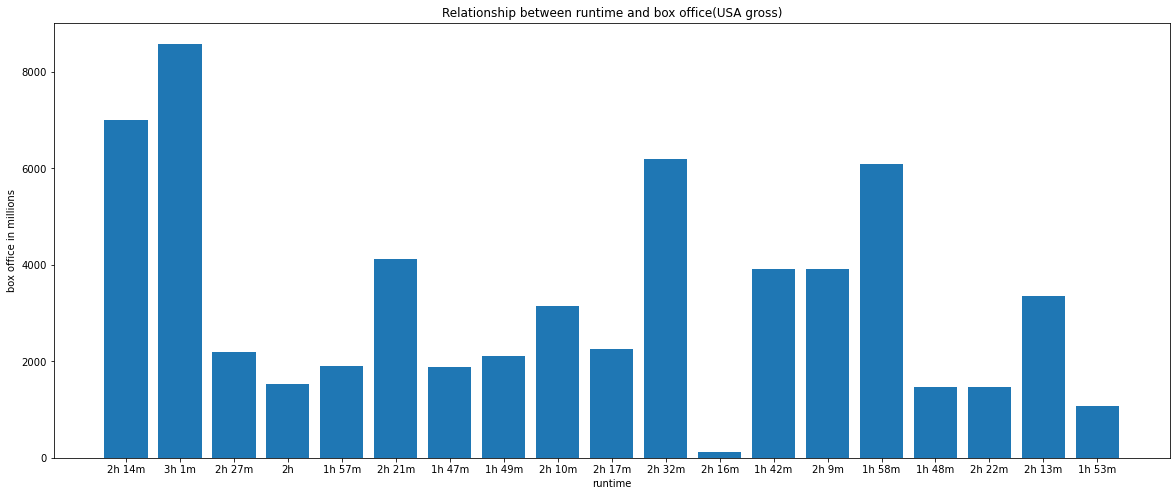

In [69]:
fig, ax = plt.subplots(figsize = (20,8))
ax.bar(x = rottent_df['runtime'], height= rottent_df['box_office_(gross_usa)'])
ax.set_xlabel('runtime')
ax.set_ylabel('box office in millions')
ax.set_title('Relationship between runtime and box office(USA gross)');

From the visualization above, there is no clear relationship between runtime and box office as even films with a runtime of less than 2 hrs perfomed well in terms of box office in usa gross. I think the performance of a movie/film is dependent on factors like genres, the crews etc no the runtime. A movie/ film can have be long but 'boring'. I would advice Microsoft not to worry much about the runtime of the movie/film.

Look at the types of films and how they relate to box office of the top performing films.

In [70]:
rottent_df.type.value_counts()

Action & Adventure    19
Name: type, dtype: int64

### Histogram showing the leading type of movies among the top performing films.

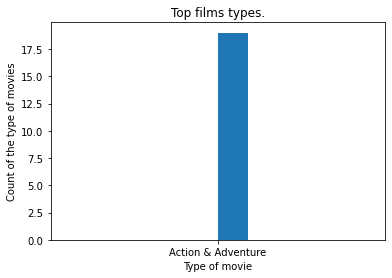

In [71]:
fig, ax = plt.subplots()
plt.hist(rottent_df.type)
ax.set_xlabel('Type of movie')
ax.set_ylabel('Count of the type of movies')
ax.set_title('Top films types.');

From the above visualization, we can see that the type of the top performing films is Action & Adventure. 
I would them recommend the creation of films that are of this(Action&Adventure) type.

### Genres

### Horizontal bar graph showing the relationship between genre and the box office of a movie. Which genre is mostly used in the production of these films?

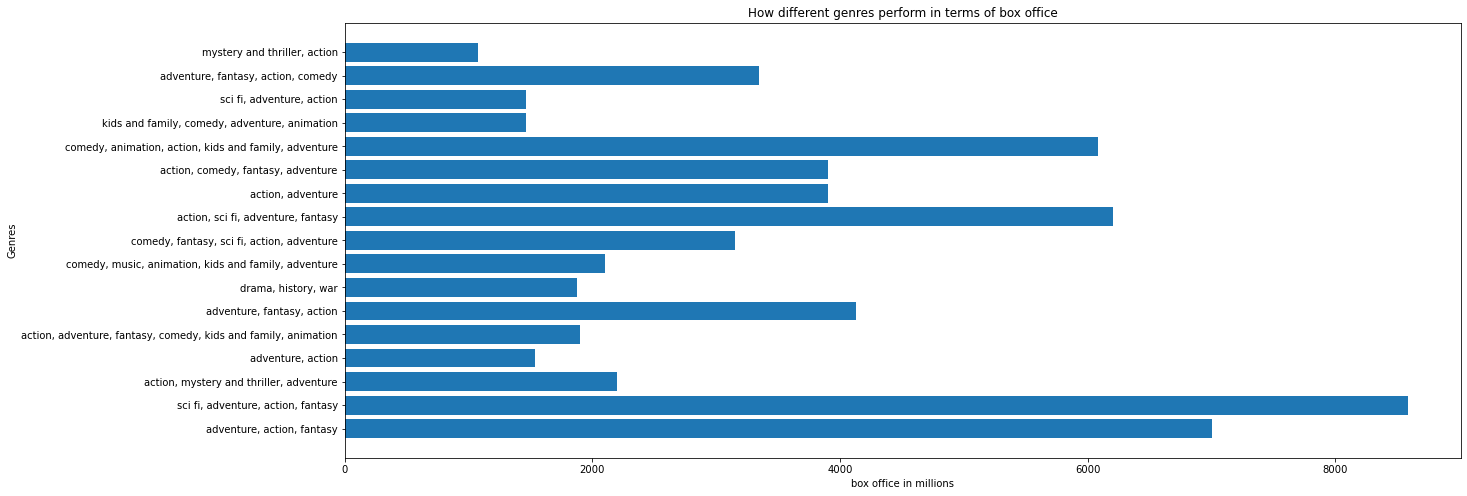

In [72]:
fig, ax = plt.subplots(figsize=(20,8))
plt.barh(rottent_df['genre'], width= rottent_df['box_office_(gross_usa)'])
ax.set_title('How different genres perform in terms of box office')
ax.set_ylabel('Genres')
ax.set_xlabel('box office in millions');

From the above visualization, sci fi, adventure, action, fantasy genre performed top in terms of box office. 
Also, (comedy, animation, action, kids and family, adventure) genre and (adventure, action, fantasy) genre does well. 
I would recommend Microsoft studio films be centered on these kinds of genres.

### We also will have to look at the rating of the top films since it will determine a lot when settling on the type of film to recommend to Microsoft.

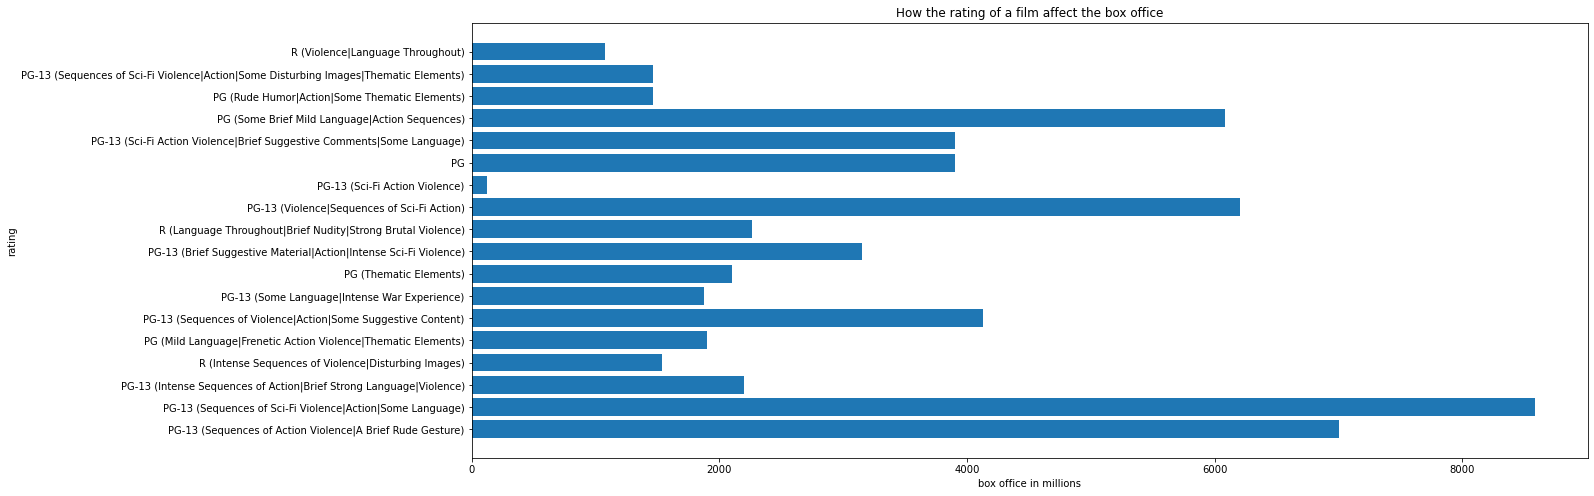

In [73]:
fig, ax = plt.subplots(figsize=(20,8))
plt.barh(rottent_df.rating,width=rottent_df['box_office_(gross_usa)'])
ax.set_ylabel('rating')
ax.set_xlabel('box office in millions')
ax.set_title('How the rating of a film affect the box office');

Also, the sample is of top performing films. The rating from the visualization above matters less in terms of box office. 
We can see the movies rated PG performing highly and also in some titles are performing not that highly.

### We then look at producers of these performing films. Who are the most sort after producers?

In [74]:
rottent_df.producer.value_counts()

Kevin Feige                                                                 3
Kevin Feige, Amy Pascal                                                     2
Kathleen Kennedy, J.J. Abrams, Bryan Burk                                   1
Peter Chernin, Dylan Clark, Rick Jaffa, Amanda Silver                       1
Avi Arad, Amy Pascal, Phil Lord, Christopher Miller, Christina Steinberg    1
Tom Cruise, Christopher McQuarrie, Jake Myers, J.J. Abrams                  1
Doug Mitchell, George Miller, P.J. Voeten                                   1
John Walker, Nicole Paradis Grindle                                         1
Clark Spencer                                                               1
Kathleen Kennedy, Ram Bergman                                               1
Nira Park, Tim Bevan, Eric Fellner                                          1
Charles Roven, Deborah Snyder, Zack Snyder, Richard Suckle                  1
Hutch Parker, Simon Kinberg, Lauren Shuler Donner               

### A horizontal bar graph of box office against producers. We seek to find the top producers in the production of the best performing films.

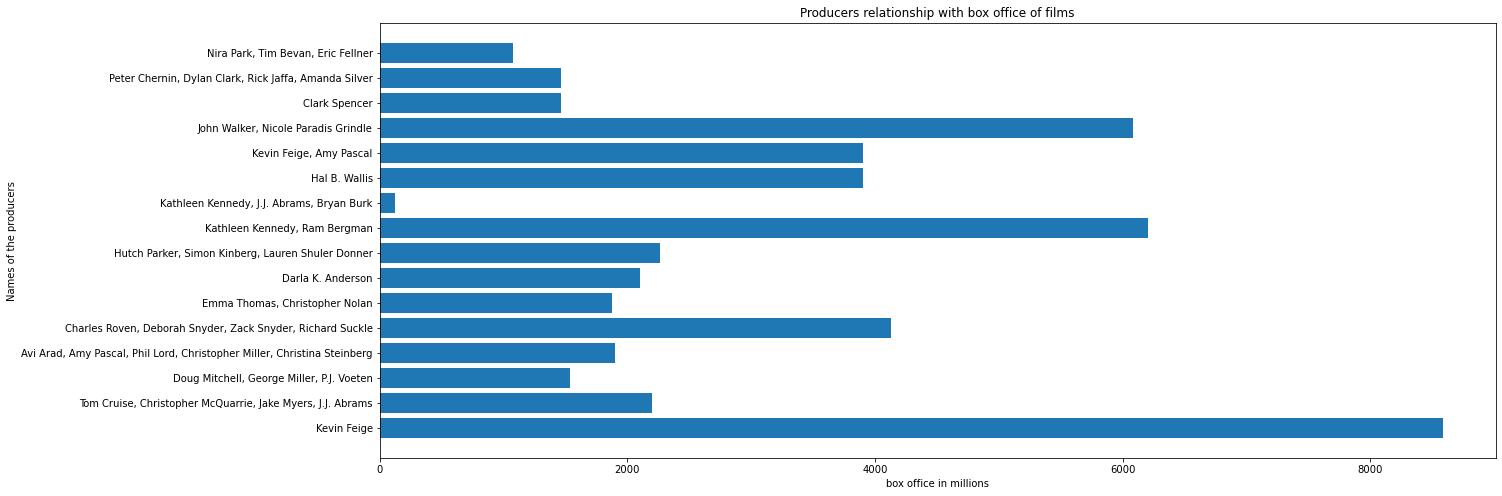

In [75]:
fig, ax = plt.subplots(figsize = (20,8))
ax.barh( rottent_df.producer, width= rottent_df['box_office_(gross_usa)'])
ax.set_xlabel('box office in millions')
ax.set_ylabel('Names of the producers')
ax.set_title('Producers relationship with box office of films');

Kevin Feige is the top film producer. I recommend microsoft to hire him to train the producers they intend to employ. This will ensure that the new producers are achieving the quality to which Kevin Feige produces films.
If possible, Microsoft can hire him. ALso among the top 3 producers are  Kathleen Kennedy and Ram Bergman.

### 3. To discover the relationship between production budget and box office, we sourced for a dataset containing this information for our analysis.

In [76]:
# Loading dataset.
budget_df = pd.read_csv('tn.movie_budgets.csv', index_col = 0)
budget_df.head(10)# extracting the top 10 movies.

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"


### Cleaning the dataset.

In [77]:
budget_df.shape

(5782, 5)

We first check for the information of this dataset using .info()

In [78]:
budget_df.info()# gives us the information of the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


From the above information, our dataset has no missing values. All columns have 5782 entries which is the shape of the entire dataset.

We then check if there are duplicates in our dataset.

In [79]:
budget_df.duplicated().sum()# checking for duplicates and summing them up.

0

Well, our dataset seems to have no duplicates. We proceed to examine the data types of the various column entries.
Production budget, domestic gross, wordwide gross and box office should all be in float data type

In [80]:
budget_df['worldwide_gross'] = budget_df['worldwide_gross'].str.replace('[$,]','')# remocing of characters in the column values.

budget_df['worldwide_gross'] = budget_df['worldwide_gross'].astype(float)#  changing the dtype from object to float.


In [81]:
budget_df['production_budget'] = budget_df['production_budget'].str.replace('[$,]','')

budget_df['production_budget'] = budget_df['production_budget'].astype(float)
budget_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625",2.776345e+09
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875",1.045664e+09
3,"Jun 7, 2019",Dark Phoenix,350000000.0,"$42,762,350",1.497624e+08
4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,"$620,181,382",1.316722e+09
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,7000.0,$0,0.000000e+00
79,"Apr 2, 1999",Following,6000.0,"$48,482",2.404950e+05
80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,"$1,338",1.338000e+03


In [82]:
budget_df.info()# Givesus the information about the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       5782 non-null   object 
 1   movie              5782 non-null   object 
 2   production_budget  5782 non-null   float64
 3   domestic_gross     5782 non-null   object 
 4   worldwide_gross    5782 non-null   float64
dtypes: float64(2), object(3)
memory usage: 271.0+ KB


We are interested with the top performing films and so we extract the data of those films that have a worldwide gross of above $ 100000000.

In [83]:
budget_df = budget_df[budget_df['worldwide_gross'] > 100000000]
budget_df.head(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625",2.776345e+09
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875",1.045664e+09
3,"Jun 7, 2019",Dark Phoenix,350000000.0,"$42,762,350",1.497624e+08
4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,"$620,181,382",1.316722e+09
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,"$936,662,225",2.053311e+09
7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,"$678,815,482",2.048134e+09
8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000.0,"$309,420,425",9.634204e+08
9,"Nov 17, 2017",Justice League,300000000.0,"$229,024,295",6.559452e+08


### Check on the relationship between production budget and worldwide gross

### Plotting a correlation matrix of production_budget and worldwide gross.

In [84]:
correlation = budget_df.corr()
correlation. style. background_gradient (cmap = 'BrBG') 

,production_budget,worldwide_gross
production_budget,1.000000,0.626202
worldwide_gross,0.626202,1.000000


### Heatmap using seaborn of production budget and wordwide gross to aid in visualization.

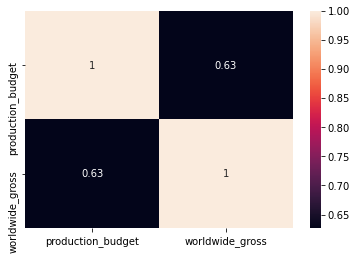

In [85]:
sns. heatmap (correlation, annot=True);

From the above correlation matrix, we can see that there is a high correlation of 0.63 between production budget and worldwide gross. The higher the production budget then the probability of a huge worldwide gross is high. I would therefore recommend Microsoft studio to invest more in the production of their films as this will see a high worldwide gross of the films.